In [11]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

conf = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [12]:
cases = conf.loc[(conf['Country/Region'] == 'China') & (conf['Province/State'] == 'Hubei') | (conf['Country/Region'] == 'Italy')]
cases_d = cases.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
cases_d_t = cases_d.transpose()
cases_d

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
62,444,444,549,761,1058,1423,3554,3554,4903,5806,...,67801,67801,67801,67801,67801,67801,67801,67801,67802,67802
137,0,0,0,0,0,0,0,0,0,2,...,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242


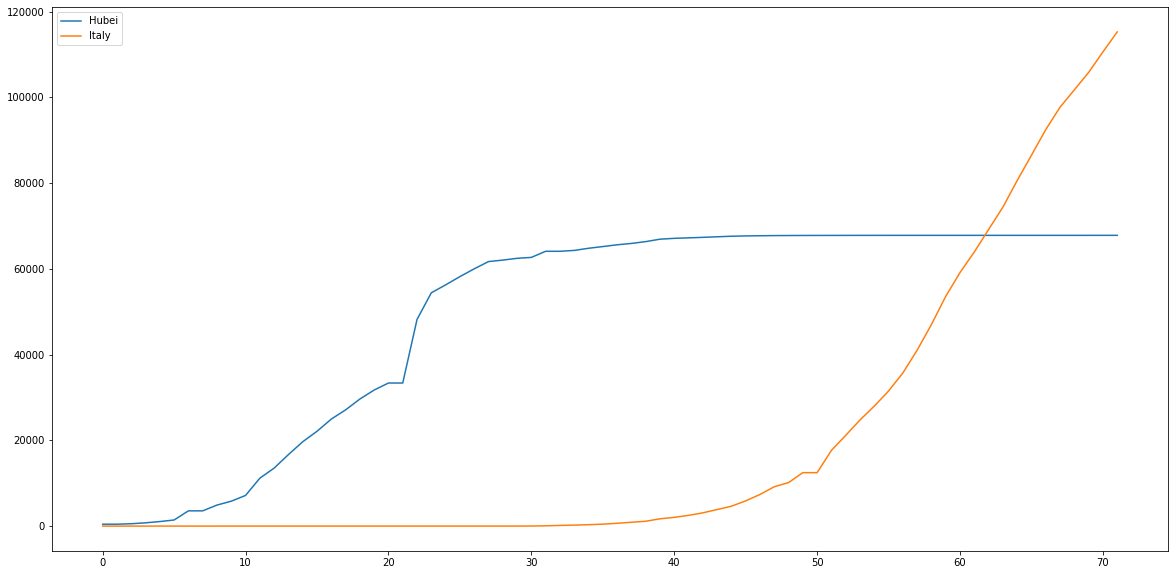

In [13]:
cases_d_t = cases_d.transpose()
cases_d_t = cases_d_t.reset_index()
cases_d_t.rename(columns={'index': 'Date', 137: 'Italy', 62: 'Hubei'}, inplace=True)
cases_d_t.plot(figsize = (20, 10))

In [14]:
# Shift data to outbreak start
cases_d_t['Italy'] = cases_d_t['Italy'].shift(-32)
cases_d_t

,Date,Hubei,Italy
0,1/22/20,444,155.0
1,1/23/20,444,229.0
2,1/24/20,549,322.0
3,1/25/20,761,453.0
4,1/26/20,1058,655.0
...,...,...,...
67,3/29/20,67801,NaN
68,3/30/20,67801,NaN
69,3/31/20,67801,NaN
70,4/1/20,67802,NaN


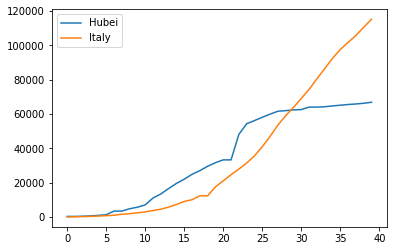

In [15]:
count = 0
for act_cases in cases_d_t['Italy']:
    if np.isnan(act_cases):
        count += 1

cases_count = len(cases_d_t['Italy']) - count
offset = cases_d_t[0:cases_count]
offset.plot()

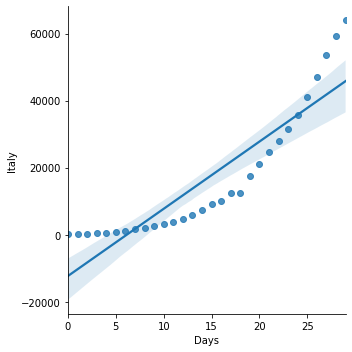

In [17]:
italy_cases = conf.loc[conf['Country/Region'] == 'Italy']
italy_cases = italy_cases.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
italy_cases_t = italy_cases.transpose()
italy_cases_t = italy_cases_t.reset_index()
italy_cases_t = italy_cases_t.drop('index', axis=1)
italy_cases_t = italy_cases_t.reset_index()
italy_cases_t.rename(columns={'index': 'Days', 137: 'Italy'}, inplace=True)
italy_cases_t['Italy'] = italy_cases_t['Italy'].shift(-32)
italy_cases_t = italy_cases_t[0:30]
sns.lmplot(x='Days',y='Italy',data=italy_cases_t,fit_reg=True) 